https://www.e3s-conferences.org/articles/e3sconf/pdf/2021/68/e3sconf_netid21_02030.pdf

**Research on Stock Price Forecast Based on ARIMA-GARCH Model**

*author : Jie Gao* 

I tried to reproduce the stock price forecasts made by Jie Gao.  
If I manage to obtain the same results as him, I could apply this model to other stocks.

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('C:/Users/Nomade05/Datas/Ping_An.csv')
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

**Select relevant columns:**

In [7]:
my_column = ['Date','Close']
data = data[my_column]
data

,Date,Close
0,2017-07-03,52.650002
1,2017-07-04,51.900002
2,2017-07-05,53.799999
3,2017-07-06,54.349998
4,2017-07-07,54.099998
...,...,...
487,2019-06-25,92.650002
488,2019-06-26,93.250000
489,2019-06-27,94.050003
490,2019-06-28,93.800003


Text(0, 0.5, 'Price')

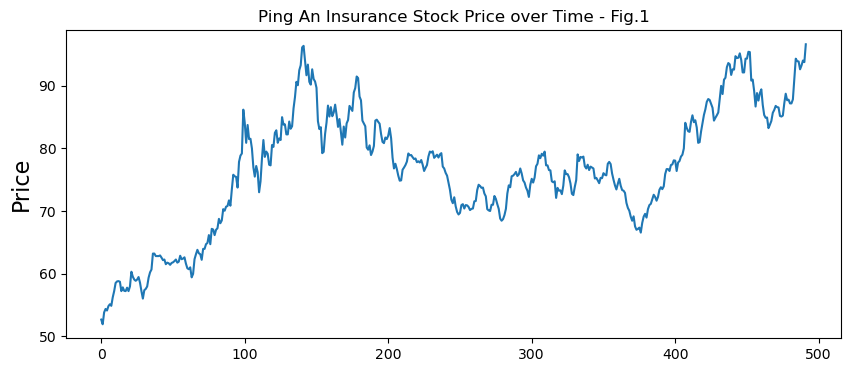

In [8]:
plt.figure(figsize=(10,4))
plt.plot(data.Close)
plt.title('Ping An Insurance Stock Price over Time - Fig.1')
plt.ylabel('Price', fontsize=16)

In [9]:
from statsmodels.tsa.stattools import adfuller

**Perform Dickey-Fuller test:**

In [10]:
result = adfuller(data.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.8698458296153093
p-value: 0.34637679260280174


In [11]:
# p-value > 0.05 , the function is not stationary

**Differencing**  

In [12]:
from pmdarima.arima.utils import ndiffs

In [13]:
ndiffs(data.Close, test='adf')

1

Text(0.5, 1.0, '1st Differenciation - Fig.4')

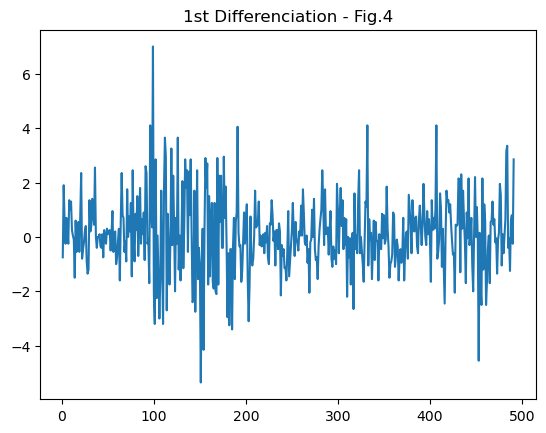

In [14]:
data_diff = data.Close.diff().dropna()
plt.plot(data_diff)
plt.title('1st Differenciation - Fig.4')

In [15]:
result = adfuller(data_diff)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -10.976205386187502
p-value: 7.658571561857664e-20


In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

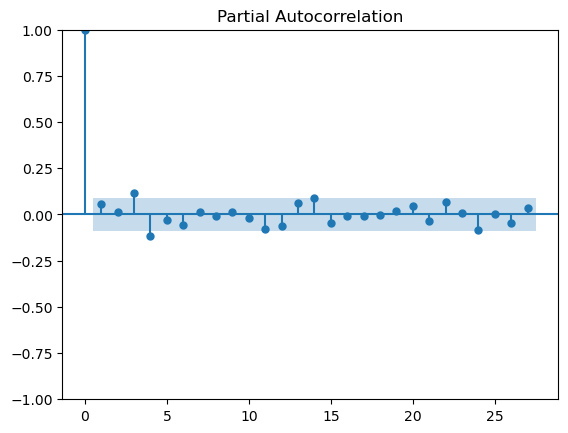

In [17]:
data_pacf = data_diff
plot_pacf(data_pacf);

**q**  

**q** is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.  

We can look at the ACF plot for the number of MA terms.

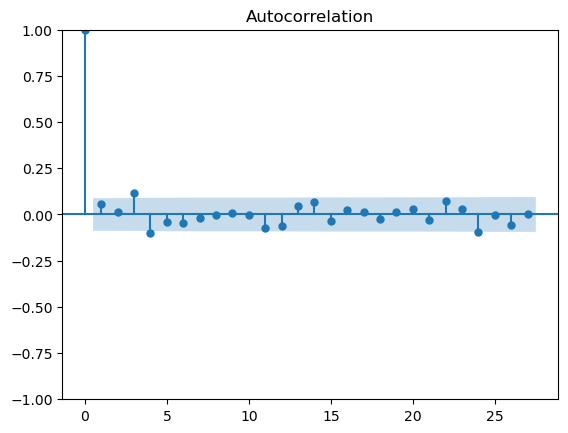

In [18]:
data_acf = data_diff
plot_acf(data_acf);

**Fitting the ARIMA Model**

In [23]:
from statsmodels.tsa.arima.model import ARIMA

order_1 = (3,1,3)
order_2 = (3,1,4)
order_3 = (4,1,3)
order_4 = (4,1,4)

# ARIMA Model
model_1 = ARIMA(data.Close, order = order_1)
result = model_1.fit()

In [24]:
print("**Regression 1**")
print(result.summary())

**Regression 1**
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  492
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -840.158
Date:                Wed, 29 Mar 2023   AIC                           1694.316
Time:                        16:48:12   BIC                           1723.691
Sample:                             0   HQIC                          1705.852
                                - 492                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2618      0.114      2.288      0.022       0.037       0.486
ar.L2         -0.0885      0.128     -0.692      0.489      -0.339       0.162
ar.L3         -0.7261      0.112   

In [25]:
model_2 = ARIMA(data.Close, order = order_2)
result = model_2.fit()
print("**Regression 2**")
print(result.summary())

**Regression 2**
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  492
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -839.458
Date:                Wed, 29 Mar 2023   AIC                           1694.916
Time:                        16:48:17   BIC                           1728.487
Sample:                             0   HQIC                          1708.099
                                - 492                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3905      0.176      2.215      0.027       0.045       0.736
ar.L2         -0.2115      0.188     -1.124      0.261      -0.580       0.157
ar.L3         -0.6489      0.169   

In [26]:
model_3 = ARIMA(data.Close, order = order_3)
result = model_3.fit()
print("**Regression 3**")
print(result.summary())

**Regression 3**
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  492
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -839.387
Date:                Wed, 29 Mar 2023   AIC                           1694.773
Time:                        16:48:19   BIC                           1728.345
Sample:                             0   HQIC                          1707.957
                                - 492                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3542      0.154      2.293      0.022       0.051       0.657
ar.L2         -0.2300      0.182     -1.264      0.206      -0.587       0.127
ar.L3         -0.6018      0.170   




**Regression 1 result show that the estimated values of other coefficients are significant at the confidence level of 5%. I therefore selected this model.**

It can be observed from Fig.4 that there is obvious "clustering" phenomenon in the fluctuation, and the fluctuation is very small in some long time periods, but very large in other long time periods, so it can be considered that there is a high probability of conditional heteroscedasticity in the error term.

In [ ]:
from statsmodels.stats.diagnostic import het_arch 

In [21]:
arch_test = het_arch(data_diff, maxlag = 4)
print(f'Lagrange mulitplier p-value: {arch_test[1]}')
print(f'F test p-value: {arch_test[3]}')

Lagrange mulitplier p-value: 8.463952541399219e-08
F test p-value: 4.594964100409977e-08


In [ ]:
# In Progress...